In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

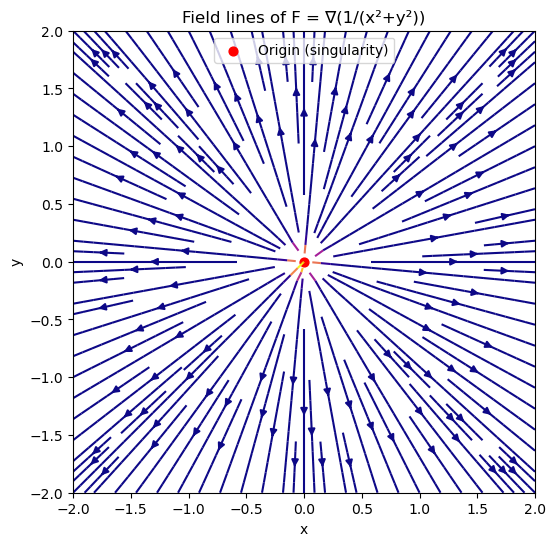

In [2]:
# Grid
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Avoid division by zero at origin
R2 = X**2 + Y**2
R2[R2 == 0] = np.nan  

# Field components
Fx = 2*X / (R2**2)
Fy = 2*Y / (R2**2)

plt.figure(figsize=(6,6))
plt.streamplot(X, Y, Fx, Fy, color=np.hypot(Fx, Fy), cmap='plasma', density=1.5)

plt.scatter(0, 0, color='red', s=40, label='Origin (singularity)')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Field lines of F = ∇(1/(x²+y²))')
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


<h1><center>GPGN328: Physics of the Earth - Assignment 2</center></h1>

<h2><center>Due: 11.59pm on Monday, September 29</center></h2>


<h3><center>Your name: </center></h3>
<h3><center>Student #: </center></h3>

### Instructions

<ul>
<li> The Assignment 2 problem set below consists of 5 questions on materials discussed in Module 4. 
<li> Please provide complete answers that clearly show the steps used in your calculations; ensure that you use correct units.
<li> At the end of each question include a short statement outlining the importance or significance of your result.
<li> It is expected (and encouraged) that you will work on this assignment in small groups; however, <b>please ensure that your write up is your own</b>. 
</ul>

### Questions

<b>Q4-1: Conservative Vector Fields.</b> The potential of ${\bf F}$ is given by $\left(x^2+y^2\right)^{-1}$.
<ol style="list-style-type: lower-alpha">
<li> Find ${\bf F}$.
<li> Describe the field lines of ${\bf F}$. Illustrating these with a matplotlib example would be helpful!
<li> Describe the equipotential surfaces of ${\bf F}$.
<li> Demonstrate that ${\bf F}$ is a conservative vector field by integrating around the perimeter of a rectangle in the $x-y$ plane. Let the rectangle extend from $x_1$ to $x_2$ in the $x$ direction and from $y_1$ to $y_2$ in the $y$ direction. Assume $x_1 > 0$. Make sure to include a sketch of how you are developing your solution. 
</ol>

---

<b>Q4-2: Derivative Derivations.</b> Assume a spherical coordinate system and let $r$ be a vector directed from the origin to a point $P$ with magnitude equal to the distance from the origin to $P$. Prove the following relationships:
<ol style="list-style-type: lower-alpha">
<li> $\nabla r = \frac{\bf r}{r}$
<li> $\nabla \cdot \left(\frac{\bf r}{r^3}\right)=0, \quad r\neq 0$
<li> $\nabla\left(\frac{1}{r}\right) = -\frac{\bf r}{r^3}, \quad r\neq 0$
</ol>

---

<b>Q4-3: Solenoidal.</b> A radial field is described by ${\bf F} = ar^n\hat{\bf r}$. In regions where $r\neq 0$, find the values of $n$ for which ${\bf F}$ is solenoidal.

---

<b>Q4-4: Newtonian Potential.</b> Let the radius and density of the (spherical) earth be represented by $a$ and $\rho$, respectively.
<ol style="list-style-type: lower-alpha">
<li> Show that the initial rate of decrease in $g$ in descending a mine shaft is equal to $g/a$ if $\rho$ is constant (i.e., what is $\left.\frac{{\rm d} g(r)}{{\rm d}r}\right|_{r=a}$)?.
<li> Assume that the earth has a spherical core of radius $b$ and density $\rho_c \neq \rho$. Show that one can derive the following relationship between $\rho_c$ and $\rho$:
</ol>

$$ \rho_c = \rho\left[1+\left( \frac{1-\lambda}{2+\lambda}  \right) \frac{a^3}{b^3}  \right]$$

where $\lambda g/a$ is defined as the initial rate of decrease of $g$ in descending the shaft. Make sure to include a sketch of how you are developing your solution.

---

<b>Q4-5: Modeling Gravitational Potential.</b>  In this exercise, we are interested in the numerical approximation of the gravity of an extended body. The gravitational potential at a point $P$ external to that body is given by,

\begin{equation}
U_g = -G\, \int_x \int_y \int_z \frac{\rho(x,y,z)}{r(x,y,z)}\,dx\,dy\,dz
\end{equation}

where $G$ is the gravitational constant, $\rho(x,y,z)$ is the density at some location $(x,y,z)$, and $r(x,y,z)$ is the distance between $(x,y,z)$ and the observation point $P$.

To numerically solve the integral, we discretize the spatial domain into evenly spaced grid points $(x_i, y_i, z_i)$, separated by some small distance $h$. We then obtain an approximation of $U_g$ by summing over all grid points,

\begin{equation}
U_g \approx -G\,\sum_i \frac{\rho(x_i,y_i,z_i)}{r(x_i,y_i,z_i)}\,V
\end{equation}

where the small volume $V$ is given by $V=h^3\approx dx\,dy\,dz$. The product $\rho(x_i,y_i,z_i) V$ equals the mass $m_i$ contained in the small volume $V$. Renaming $r_i=r(x_i,y_i,z_i)$, we may rewrite the above equation as

\begin{equation}
U_g \approx -G\,\sum_i \frac{m_i}{r_i}
\end{equation}

An approximation that we will make throughout this exercise is that the Earth is contained in a small rectangular box. Though this is obviously not realistic, it greatly simplifies the calculations, while still illustrating the basic principles.

### STEP 1: Computational domain and density distribution

**As a first step, we set up the computational domain, and we define some density distribution.** For convenience, we limit ourselves to a 2-D density distribution, meaning that we ignore the spatial extension of the body in $y$-direction.

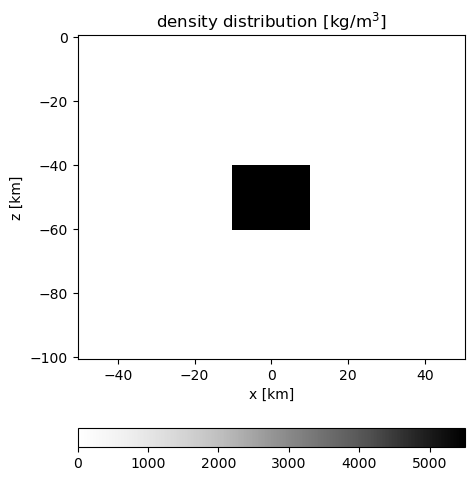

In [3]:
# . . Define gravitational constant
G=6.67508e-11

# . . Dimension of the computational domain [m].
x_min=-50.0e3
x_max=50.0e3
z_min=-100.0e3
z_max=0.0

# . . Grid spacing [m] and cell volume.
h=1.0e3
V=h**3
nx=np.int64((x_max-x_min)/h)
nz=np.int64((z_max-z_min)/h)

# . . Coordinate axes.
x=np.linspace(x_min,x_max,nx)
z=np.linspace(z_min,z_max,nz)
xv,zv=np.meshgrid(x,z,indexing='ij')

# . . Define some density distribution.
rho=np.zeros(np.shape(xv))
rho[40:60,40:60]=5500.0

# . . Plot density distribution.
plt.figure(figsize=(5,6))
plt.pcolor(xv/1000.0,zv/1000.0,rho,cmap='Greys')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'density distribution [kg$/$m$^3$]')
plt.colorbar(location="bottom")
plt.show()

### STEP 2: Gravitational Potential

**Based on the setup above, we can compute the gravitational potential at some observation points.** For this, we initially choose a line of closely spaced points located $10$ m above the surface.

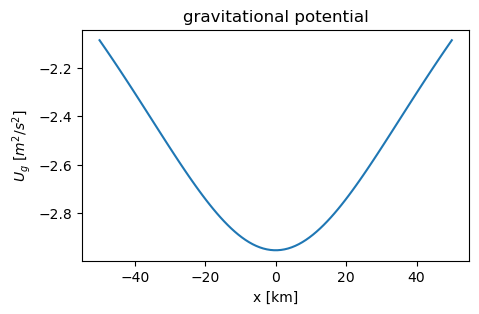

In [4]:
# . . Define observation points.
x_obs=x
z_obs=10.0*np.ones(nx)

# . . Initialize gravitational potential.
U=np.zeros(len(x_obs))

# . . Loop over all observation points.
for k in range(len(x_obs)):
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U[k]=-G*V*np.sum(rho/r)
            
# . . Plot gravitational potential
plt.figure(figsize=(5,3))
plt.plot(x_obs/1000.0,U)
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('gravitational potential')
plt.show()

### STEP 3: Alternative Density Distribution

**The previous lines of code are very flexible and may be used to study the gravitational potential of other density distributions.** As an example, we consider a denser version of the square from Step 2, but with a low-density inclusion.

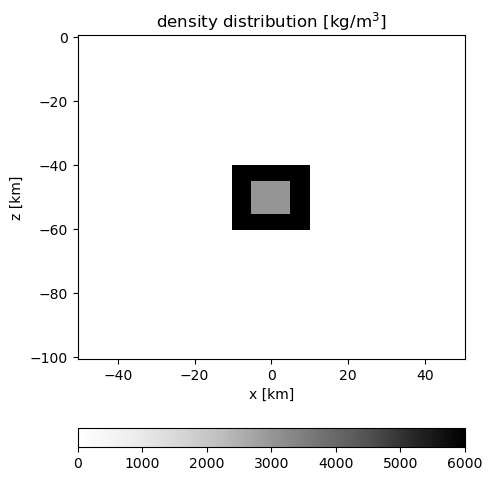

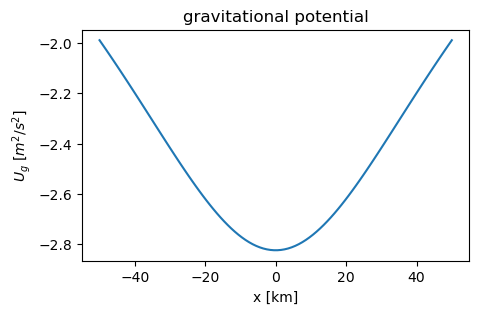

In [5]:
# . . Define some alternative density distribution.
rho_alt=np.zeros(np.shape(xv))
rho_alt[40:60,40:60]=6000.0
rho_alt[45:55,45:55]=3000.0

# . . Plot density distribution.
plt.figure(figsize=(5,6))
plt.pcolor(xv/1000.0,zv/1000.0,rho_alt,cmap='Greys')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'density distribution [kg$/$m$^3$]')
plt.colorbar(location='bottom')
plt.show()

# . . Initialize gravitational potential.
U_alt=np.zeros(len(x_obs))

# . . Loop over all observation points.
for k in range(len(x_obs)):
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_alt[k]=-G*V*np.sum(rho_alt/r)

# . . Plot gravitational potential.
plt.figure(figsize=(5,3))
plt.plot(x_obs/1000.0,U_alt)
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('gravitational potential')
plt.show()

### COMPUTATIONAL EXERCISES:

<ol style="list-style-type: lower-alpha">
<li> In Step 3, modify the density of the inclusion such that the resulting gravity potential <i>U_alt</i> resembles the original potential from Step 2 <i>U</i> as closely as possible. For this, plot the difference between the variables <i>U</i> and <i>U_alt</i>, normalized by the maximum value of <i>U</i>. What does your result imply for our ability to distinguish different kinds of density distributions in the Earth?

<li> Modify the 2-D density distribution in order to model the gravity potential for the following geologic settings: (a) a normal fault, (b) a syncline, and (c) a void inside a homogeneous medium. Provide a description of the different types of gravity potential ''anomalies'' that you see.
    
<li> For the three examples in Exercise b, compute the gravitational potential on a 2-D grid of observation points above the surface ($z>0$) and plot the equipotential surface using the <i>plt.contour</i> function. Comment on how the observed gravity potential anomaly changes with height $z$ above the observation surface.
    
</ol>

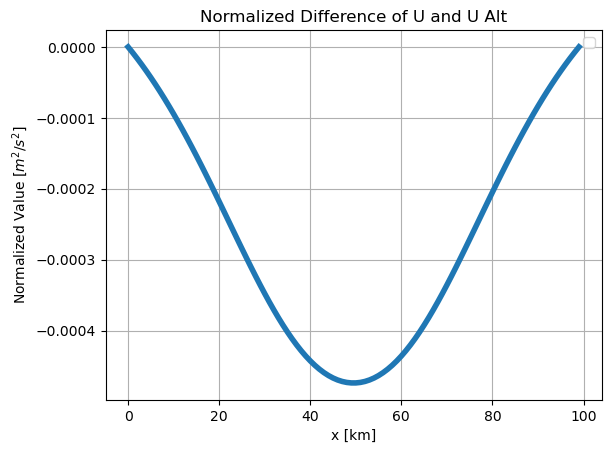

In [6]:
# A)
U_norm = U / np.max(U)
U_alt_norm = U_alt / np.max(U_alt)
difference = U_norm - U_alt_norm


plt.plot(difference, linewidth=4)
#plt.plot(U_alt, U_alt_norm, label="U Alt", linewidth=3, linestyle=(0, (5, 10)))

plt.xlabel('x [km]')
plt.ylabel("Normalized Value [$m^2 / s^2$]")
plt.legend()
plt.title('Normalized Difference of U and U Alt')
plt.grid(True)
plt.show()


## Problem B: Normal Fault

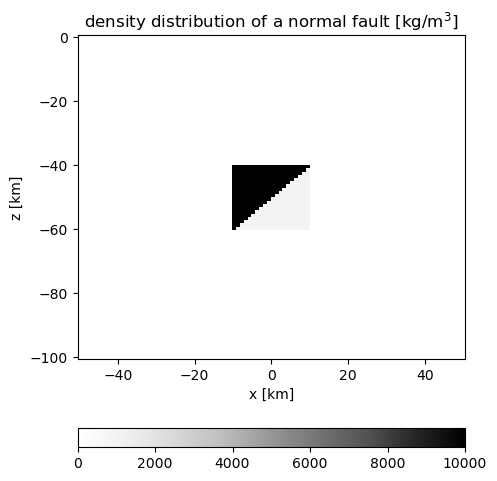

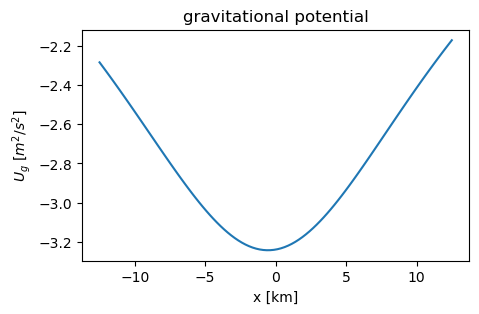

In [7]:
### B)
## Modeling a normal fault:
# . . Define some alternative density distribution.

x_obs=x
z_obs=10.0*np.ones(nx)

rho_b1=np.zeros(np.shape(xv))
# Define square bounds
x_min, x_max = 40, 60
z_min, z_max = 40, 60

# Loop over the square and assign density based on diagonal
for i in range(z_min, z_max):
    for j in range(x_min, x_max):
        # Diagonal line: z = slope*(x - x_min) + z_min
        slope = 1  # positive slope
        if i > slope * (j - x_min) + z_min:
            rho_b1[i, j] = 1000.0  # above the line
        else:
            rho_b1[i, j] = 10000.0  # below the line
# . . Plot density distribution.
plt.figure(figsize=(5,6))
plt.pcolor(xv/1000.0,zv/1000.0,rho_b1,cmap='Greys')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'density distribution of a normal fault [kg$/$m$^3$]')
plt.colorbar(location='bottom')
plt.show()

# . . Initialize gravitational potential.
U_b1=np.zeros(len(x_obs))

# . . Loop over all observation points.
for k in range(len(x_obs)):
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_b1[k]=-G*V*np.sum(rho_b1/r)

# . . Plot gravitational potential.
plt.figure(figsize=(5,3))
plt.plot(x_obs/4000,U_b1)
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('gravitational potential')
plt.show()

## Problem B: Syncline

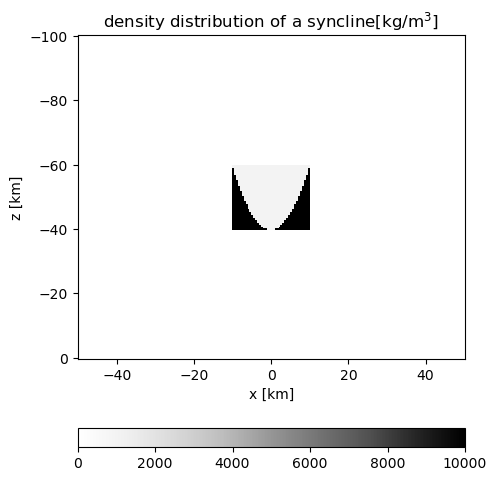

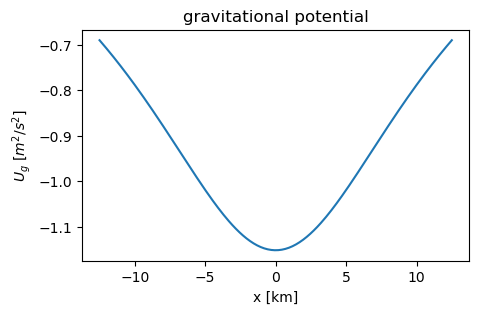

In [8]:
nx, nz = 200, 200
x = np.linspace(-50, 50, nx)       # km
z = np.linspace(0, -100, nz)       # km, negative downward
xv, zv = np.meshgrid(x, z)

x_obs = x
z_obs = -10.0*np.ones(nx)          # observation line near surface

# -----------------------------
# Square bounds for syncline
# -----------------------------
x_min, x_max = -10, 10             # km
z_top, z_bottom = -40, -60         # km

# Boolean mask for the 20x20 square
square_mask = (xv >= x_min) & (xv <= x_max) & (zv <= z_top) & (zv >= z_bottom)

# -----------------------------
# Density parameters
# -----------------------------
rho_syncline = 1000      # density inside parabola
rho_background = 10000    # density outside parabola but inside square
rho_outside = 0          # outside square

# Initialize density field
rho_field = np.zeros_like(xv)  # zero everywhere outside square

# -----------------------------
# Upward-opening parabola
# -----------------------------
x_center = 0
z_center = z_top           # maximum z at center of parabola (-40 km)
width = (x_max - x_min)/2

# parabola coefficient to reach bottom at edges
a = (z_center - z_bottom) / width**2

# Compute parabola only inside the square
x_block = xv[square_mask]
z_block = zv[square_mask]

# Upward-opening parabola: max at center, min at edges
z_parabola = z_center - a * (x_block - x_center)**2

# Assign densities
# Points below parabola = syncline, above parabola = background
rho_block = np.where(z_block <= z_parabola, rho_syncline, rho_background)
rho_field[square_mask] = rho_block

# -----------------------------
# Plot density distribution
# -----------------------------
plt.figure(figsize=(5,6))
plt.pcolor(xv, zv, rho_field, cmap='Greys', shading='auto')
plt.gca().invert_yaxis()  # depth increases downward
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('density distribution of a syncline[kg$/$m$^3$]')
plt.colorbar(location='bottom')
plt.show()

# . . Initialize gravitational potential.
U_syncline=np.zeros(len(x_obs))

# . . Loop over all observation points.
for k in range(len(x_obs)):
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_syncline[k]=-G*V*np.sum(rho_field/r)

# . . Plot gravitational potential.
plt.figure(figsize=(5,3))
plt.plot(x_obs/4,U_syncline/10000)
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('gravitational potential')
plt.show()


## Problem B: Homogenous Medium

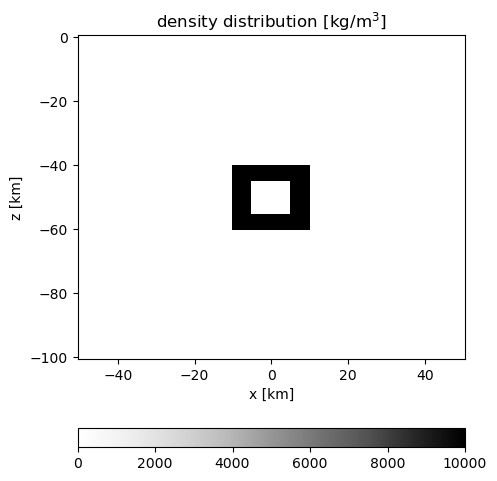

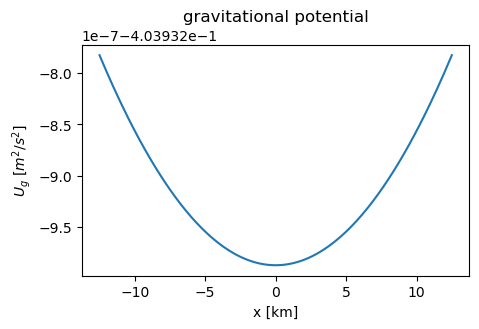

In [9]:
# . . Define gravitational constant
G=6.67508e-11

# . . Dimension of the computational domain [m].
x_min=-50.0e3
x_max=50.0e3
z_min=-100.0e3
z_max=0.0

# . . Grid spacing [m] and cell volume.
h=1.0e3
V=h**3
nx=np.int64((x_max-x_min)/h)
nz=np.int64((z_max-z_min)/h)

# . . Coordinate axes.
x=np.linspace(x_min,x_max,nx)
z=np.linspace(z_min,z_max,nz)
xv,zv=np.meshgrid(x,z,indexing='ij')

# . . Define some alternative density distribution.
rho_alt=np.zeros(np.shape(xv))
rho_alt[40:60,40:60]=10000
rho_alt[45:55,45:55]= 0

# . . Plot density distribution.
plt.figure(figsize=(5,6))
plt.pcolor(xv/1000.0,zv/1000.0,rho_alt,cmap='Greys')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'density distribution [kg$/$m$^3$]')
plt.colorbar(location='bottom')
plt.show()

# . . Initialize gravitational potential.
U_alt=np.zeros(len(x_obs))

# . . Loop over all observation points.
for k in range(len(x_obs)):
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_alt[k]=-G*V*np.sum(rho_alt/r)

# . . Plot gravitational potential.
plt.figure(figsize=(5,3))
plt.plot(x_obs/4,U_alt/10)
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('gravitational potential')
plt.show()

## C:

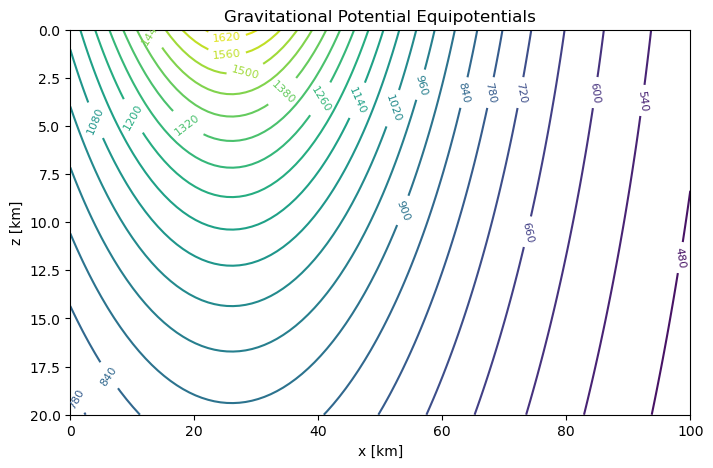

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Grid for density model
# -----------------------------
nx, nz = 200, 200
x = np.linspace(0, 100, nx)       # km
z = np.linspace(0, -100, nz)      # km, negative downward
xv, zv = np.meshgrid(x, z)

# -----------------------------
# Normal fault density model
# -----------------------------
rho_b1 = np.zeros_like(xv)

# Square bounds
x_min, x_max = 40, 60
z_min, z_max = 40, 60

# Loop over square and assign density based on diagonal line z = slope*(x - x_min) + z_min
slope = 1  # positive slope
for i in range(z_min, z_max):
    for j in range(x_min, x_max):
        if i > slope * (j - x_min) + z_min:
            rho_b1[i, j] = 1000.0  # above the line
        else:
            rho_b1[i, j] = 10000.0  # below the line

# -----------------------------
# Observation grid above surface
# -----------------------------
nx_obs, nz_obs = 100, 50
x_obs = np.linspace(0, 100, nx_obs)
z_obs = np.linspace(0, 20, nz_obs)  # km above surface
xv_obs, zv_obs = np.meshgrid(x_obs, z_obs)

# -----------------------------
# Compute gravitational potential
# -----------------------------
G = 6.67430e-11  # m^3/kg/s^2
dx = x[1] - x[0]
dz = z[1] - z[0]
dA = dx * dz * 1e6 * 1e6  # convert km^2 to m^2

U = np.zeros_like(xv_obs)

for i in range(nz_obs):
    for j in range(nx_obs):
        r = np.sqrt((xv_obs[i,j]*1e3 - xv*1e3)**2 + (zv_obs[i,j]*1e3 - zv*1e3)**2)
        r[r == 0] = 1e-6  # avoid division by zero
        U[i,j] = -G * np.sum(rho_b1 * dA / r)

# -----------------------------
# Plot equipotential contours
# -----------------------------
plt.figure(figsize=(8,5))
cont = plt.contour(xv_obs, zv_obs, U, levels=20, cmap='viridis')
plt.clabel(cont, inline=True, fontsize=8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Gravitational Potential Equipotentials')
plt.gca().invert_yaxis()
plt.show()

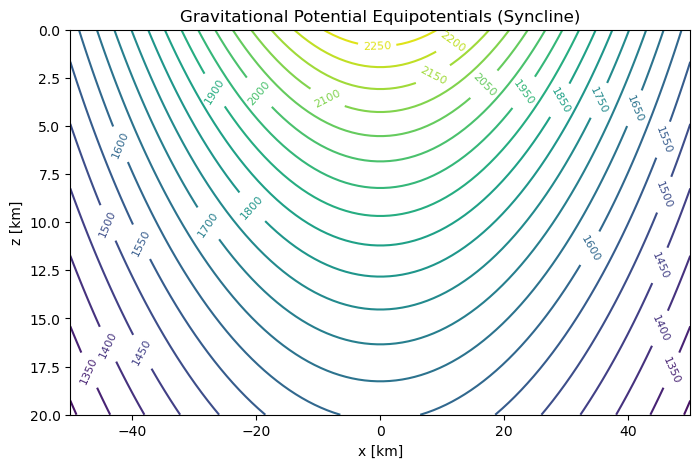

In [11]:
# -----------------------------
# Grid for density model
# -----------------------------
nx, nz = 200, 200
x = np.linspace(-50, 50, nx)       # km
z = np.linspace(0, -100, nz)       # km, negative downward
xv, zv = np.meshgrid(x, z)

# -----------------------------
# Syncline density model
# -----------------------------
# Square bounds
x_min, x_max = -10, 10
z_top, z_bottom = -40, -60

# Boolean mask for the 20x20 km square
square_mask = (xv >= x_min) & (xv <= x_max) & (zv <= z_top) & (zv >= z_bottom)

# Density parameters
rho_syncline = 1000      # inside parabola
rho_background = 10000   # outside parabola but inside square
rho_field = np.zeros_like(xv)

# Upward-opening parabola
x_center = 0
z_center = z_top
width = (x_max - x_min)/2
a = (z_center - z_bottom) / width**2

x_block = xv[square_mask]
z_block = zv[square_mask]

z_parabola = z_center - a * (x_block - x_center)**2

# Assign densities
rho_block = np.where(z_block <= z_parabola, rho_syncline, rho_background)
rho_field[square_mask] = rho_block

# -----------------------------
# Observation grid above surface
# -----------------------------
nx_obs, nz_obs = 100, 50
x_obs = np.linspace(-50, 50, nx_obs)
z_obs = np.linspace(0, 20, nz_obs)  # km above surface
xv_obs, zv_obs = np.meshgrid(x_obs, z_obs)

# -----------------------------
# Compute gravitational potential
# -----------------------------
G = 6.67430e-11  # m^3/kg/s^2
dx = x[1] - x[0]
dz = z[1] - z[0]
dA = dx * dz * 1e6 * 1e6  # convert km^2 to m^2

U = np.zeros_like(xv_obs)

for i in range(nz_obs):
    for j in range(nx_obs):
        r = np.sqrt((xv_obs[i,j]*1e3 - xv*1e3)**2 + (zv_obs[i,j]*1e3 - zv*1e3)**2)
        r[r == 0] = 1e-6  # avoid division by zero
        U[i,j] = -G * np.sum(rho_field * dA / r)

# -----------------------------
# Plot equipotential contours
# -----------------------------
plt.figure(figsize=(8,5))
cont = plt.contour(xv_obs, zv_obs, U, levels=20, cmap='viridis')
plt.clabel(cont, inline=True, fontsize=8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Gravitational Potential Equipotentials (Syncline)')
plt.gca().invert_yaxis()
plt.show()


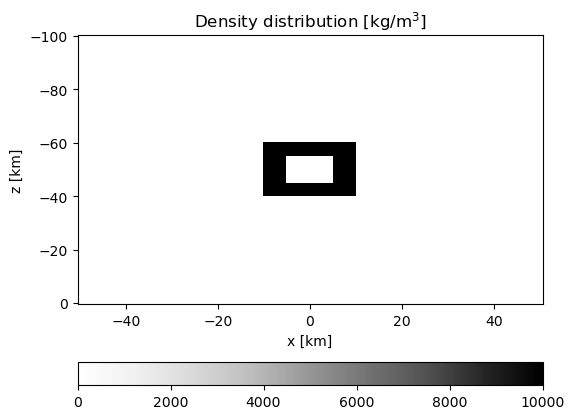

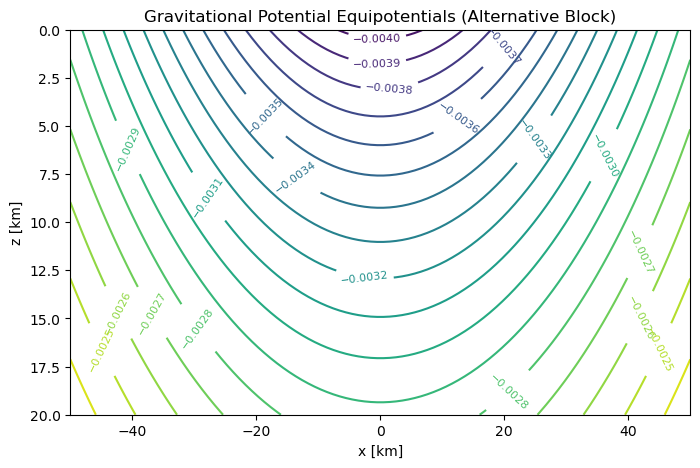

In [12]:
# -----------------------------
# Gravitational constant
# -----------------------------
G = 6.67508e-11  # m^3/kg/s^2

# -----------------------------
# Computational domain [m]
# -----------------------------
x_min, x_max = -50e3, 50e3
z_min, z_max = -100e3, 0
h = 1e3             # grid spacing [m]
nx = int((x_max - x_min)/h)
nz = int((z_max - z_min)/h)

# -----------------------------
# Coordinate axes
# -----------------------------
x = np.linspace(x_min, x_max, nx)
z = np.linspace(z_min, z_max, nz)
xv, zv = np.meshgrid(x, z, indexing='ij')

# -----------------------------
# Density distribution
# -----------------------------
rho_alt = np.zeros_like(xv)
rho_alt[40:60, 40:60] = 10000
rho_alt[45:55, 45:55] = 0  # small hole inside

# -----------------------------
# Plot density distribution
# -----------------------------
plt.figure(figsize=(6,5))
plt.pcolor(xv/1000, zv/1000, rho_alt, cmap='Greys', shading='auto')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'Density distribution [kg/m$^3$]')
plt.colorbar(location='bottom')
plt.gca().invert_yaxis()
plt.show()

# -----------------------------
# Observation grid above surface
# -----------------------------
nx_obs, nz_obs = 100, 50
x_obs = np.linspace(x_min, x_max, nx_obs)
z_obs = np.linspace(0, 20e3, nz_obs)  # 0–20 km above surface
xv_obs, zv_obs = np.meshgrid(x_obs, z_obs, indexing='ij')

# -----------------------------
# Compute gravitational potential
# -----------------------------
dA = h**2  # m^2, cell area in x-z plane

U = np.zeros_like(xv_obs)

for i in range(nx_obs):
    for j in range(nz_obs):
        r = np.sqrt((xv_obs[i,j] - xv)**2 + (zv_obs[i,j] - zv)**2)
        r[r == 0] = 1e-6  # avoid division by zero
        U[i,j] = -G * np.sum(rho_alt * dA / r)

# -----------------------------
# Plot equipotential contours
# -----------------------------
plt.figure(figsize=(8,5))
cont = plt.contour(xv_obs/1000, zv_obs/1000, U, levels=20, cmap='viridis')
plt.clabel(cont, inline=True, fontsize=8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Gravitational Potential Equipotentials (Alternative Block)')
plt.gca().invert_yaxis()
plt.show()
